# (Homework) Week 7 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Simon Yuen\
**Email:** scy3443@nyu.edu

---

## Problem A: Bayesian Dice Game (Posterior Inference)

You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

| Die | P(6) | P(1–5) |
|-----|------|--------|
| A   | 0.10 | 0.90   |
| B   | 0.30 | 0.70   |
| C   | 0.60 | 0.40   |

Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

Your job is to infer which die was used using **Bayes’ Theorem**:

$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

**Tasks:**
1. Simulate the experiment by picking a random die and rolling it 10 times.
2. Compute posterior probabilities for each die given observed sixes.
3. Plot likelihoods and posterior probabilities.
4. Evaluate inference accuracy over 100 rounds.

Observed 3 sixes out of 10 rolls
P(A | 3 sixes) = 0.157
P(B | 3 sixes) = 0.728
P(C | 3 sixes) = 0.116
True die: B


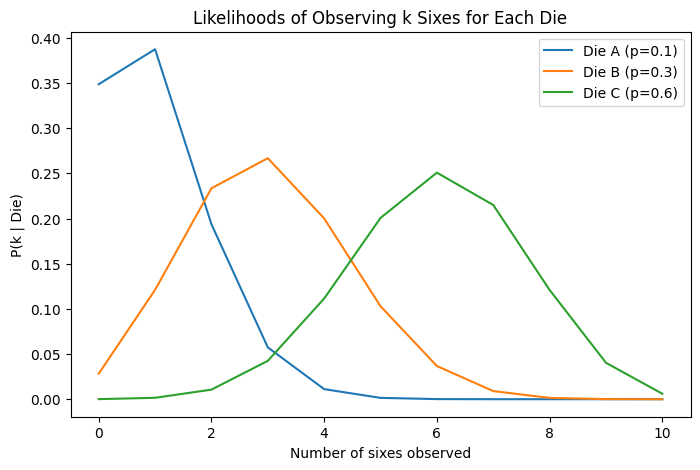

Accuracy over 100 rounds: 0.74


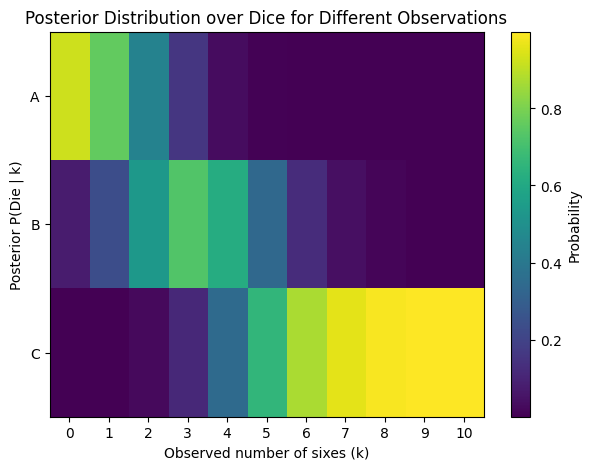

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Dice setup
dice_probs = {'A': 0.1, 'B': 0.3, 'C': 0.6}
dice_names = list(dice_probs.keys())
prior = np.array([1/3, 1/3, 1/3])
n_rolls = 10

# Compute binomial probability mass function
def binomial_prob(n, k, p):
    if k < 0 or k > n:
        return 0
    # C(n, k) * p^k * (1-p)^(n-k)
    binomial_coeff = math.comb(n, k)
    return binomial_coeff * (p ** k) * ((1 - p) ** (n - k))

def simulate_round():
    true_die = np.random.choice(dice_names)
    p = dice_probs[true_die]
    k = np.random.binomial(n_rolls, p)
    return true_die, k

def posterior_given_k(k):
    likelihoods = np.array([binomial_prob(n_rolls, k, dice_probs[die]) for die in dice_names])
    
    numerator = likelihoods * prior
    
    posterior = numerator / np.sum(numerator)
    return posterior

# Example run
true_die, k = simulate_round()
posterior = posterior_given_k(k)

print(f"Observed {k} sixes out of {n_rolls} rolls")
for die, p in zip(dice_names, posterior):
    print(f"P({die} | {k} sixes) = {p:.3f}")
print(f"True die: {true_die}")

# Likelihood plot
ks = np.arange(0, 11)
plt.figure(figsize=(8,5))
for die, p in dice_probs.items():
    plt.plot(ks, [binomial_prob(n_rolls, k, p) for k in ks], label=f"Die {die} (p={p})")
plt.xlabel('Number of sixes observed')
plt.ylabel('P(k | Die)')
plt.legend()
plt.title('Likelihoods of Observing k Sixes for Each Die')
plt.show()

# Accuracy evaluation
num_trials = 100
correct = 0
for _ in range(num_trials):
    true_die, k = simulate_round()
    posterior = posterior_given_k(k)
    predicted_die = dice_names[np.argmax(posterior)]
    correct += (predicted_die == true_die)

print(f"Accuracy over {num_trials} rounds: {correct/num_trials:.2f}")

# Posterior visualizations
posterior_matrix = np.array([posterior_given_k(k) for k in ks])
plt.figure(figsize=(7,5))
plt.imshow(posterior_matrix.T, cmap='viridis', aspect='auto')
plt.xticks(ks)
plt.yticks(range(3), dice_names)
plt.xlabel('Observed number of sixes (k)')
plt.ylabel('Posterior P(Die | k)')
plt.colorbar(label='Probability')
plt.title('Posterior Distribution over Dice for Different Observations')
plt.show()

## Problem B: Linear Regression
Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

In [2]:
x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

X = np.c_[np.ones(len(x)), x]
theta = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = X @ theta
mse_linear = np.mean((y - y_pred) ** 2)
print('Linear theta:', theta, 'MSE:', mse_linear)

Linear theta: [5. 0.] MSE: 2.8


## Problem C: Gradient Descent
Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)

Learning rate α = 1/400:
  Step 0: w = 13.000000
  Step 1: w = 12.600000
  Step 2: w = 12.395200
  Step 3: w = 12.259406
  Step 4: w = 12.159529
  Step 5: w = 12.081579

Learning rate α = 1/4000000:
  Step 0: w = 13.000000
  Step 1: w = 12.999960
  Step 2: w = 12.999920
  Step 3: w = 12.999880
  Step 4: w = 12.999840
  Step 5: w = 12.999800


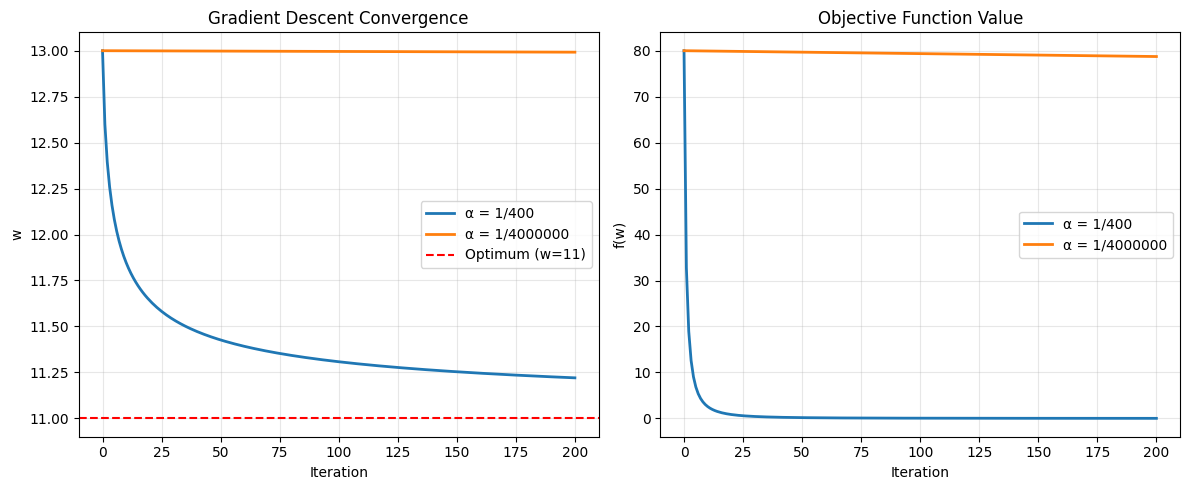

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Function
def grad_descent_vals(w0, alpha, steps):
    history = [w0]
    w = w0
    
    for _ in range(steps):
        gradient = 20 * (w - 11) ** 3
        w = w - alpha * gradient
        history.append(w)
    
    return np.array(history)

hist_140 = grad_descent_vals(13, 1/400, 200)
hist_180 = grad_descent_vals(13, 1/4000000, 200)

print("Learning rate α = 1/400:")
for i in range(min(6, len(hist_140))):
    print(f"  Step {i}: w = {hist_140[i]:.6f}")

print("\nLearning rate α = 1/4000000:")
for i in range(min(6, len(hist_180))):
    print(f"  Step {i}: w = {hist_180[i]:.6f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(hist_140, label='α = 1/400', linewidth=2)
plt.plot(hist_180, label='α = 1/4000000', linewidth=2)
plt.axhline(y=11, color='r', linestyle='--', label='Optimum (w=11)')
plt.xlabel('Iteration')
plt.ylabel('w')
plt.legend()
plt.title('Gradient Descent Convergence')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
f_vals_140 = 5 * (hist_140 - 11) ** 4
f_vals_180 = 5 * (hist_180 - 11) ** 4
plt.plot(f_vals_140, label='α = 1/400', linewidth=2)
plt.plot(f_vals_180, label='α = 1/4000000', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('f(w)')
plt.legend()
plt.title('Objective Function Value')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

ALL THE BEST!